# Import Libraries

In [3]:
!pip install wordcloud

     ------------------------------------- 152.1/152.1 kB 99.8 kB/s eta 0:00:00


In [5]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 631.9 kB/s eta 0:00:00


In [31]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from sklearn.utils import resample
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from transformers import RobertaTokenizer
from transformers import TFRobertaModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from sklearn.metrics import precision_recall_curve

import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve,auc
from keras import regularizers
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from itertools import cycle

lemma = WordNetLemmatizer()
stopword = set(STOPWORDS)
nltk.download('omw-1.4')
%matplotlib inline
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')


from nltk.corpus import brown
nltk.download("brown")
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading brown: <urlopen error [WinE

# Read Train Data

In [8]:
train_data=pd.read_csv("train.csv")

# Read Test Data

In [9]:
test_data=pd.read_csv("test.csv")

# Read Wordcloud Image

In [11]:
wordcloud_mask=np.array(Image.open("twitter.png"))




```
* 0==Positive Data
* 1==Racist & Sexist Data
```



In [12]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [13]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [14]:
train_data=train_data.drop(["id"],axis=1)

In [15]:
train_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [16]:
new_column=["tweet","label"]
train_data=train_data[new_column]
train_data=train_data.reindex(columns=new_column)

In [17]:
train_data.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [18]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

# Racist Data Vs Positive Data

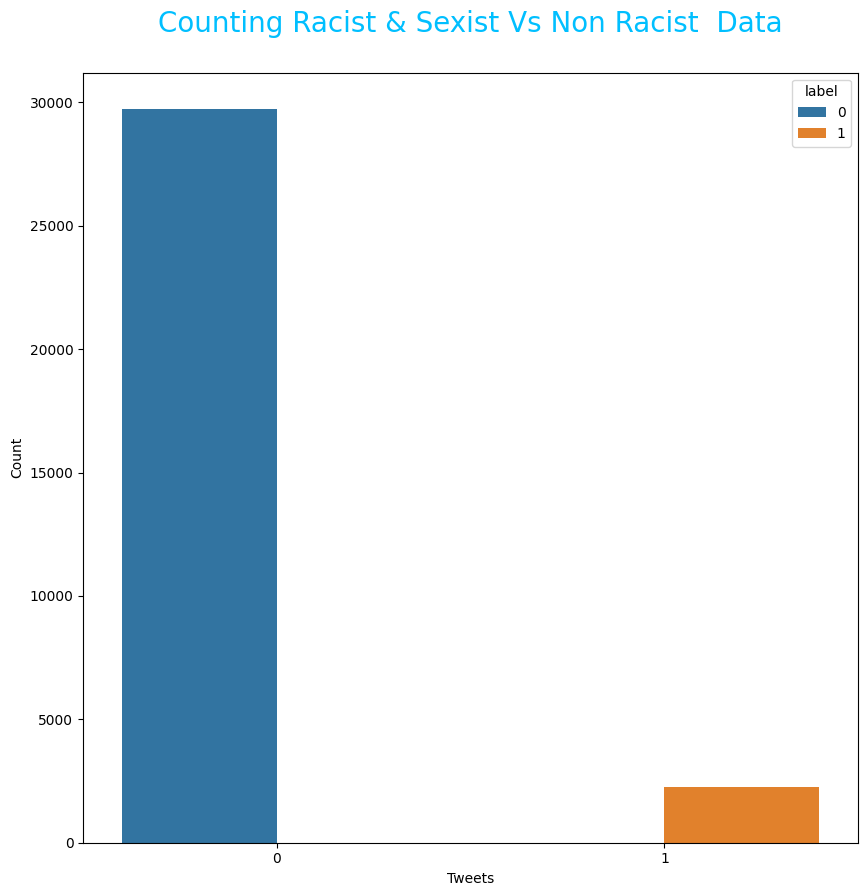

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_data, x='label', hue='label')
plt.title("Counting Racist & Sexist Vs Non Racist  Data\n",fontsize=20,color="deepskyblue")
plt.xlabel('Tweets')
plt.ylabel("Count")
plt.show()

In [20]:
train_data_len = train_data['tweet'].str.len()
test_data_len = test_data['tweet'].str.len()

In [21]:
print("Train Text Data Length is",train_data_len)

Train Text Data Length is 0        102
1        122
2         21
3         86
4         39
        ... 
31957     68
31958    131
31959     63
31960     67
31961     32
Name: tweet, Length: 31962, dtype: int64


In [22]:
print("Test Text Data Length is",test_data_len)

Test Text Data Length is 0         90
1        101
2         71
3        142
4         93
        ... 
17192    108
17193     96
17194    145
17195    104
17196     64
Name: tweet, Length: 17197, dtype: int64


# Train Data Length Vs Test Data Length

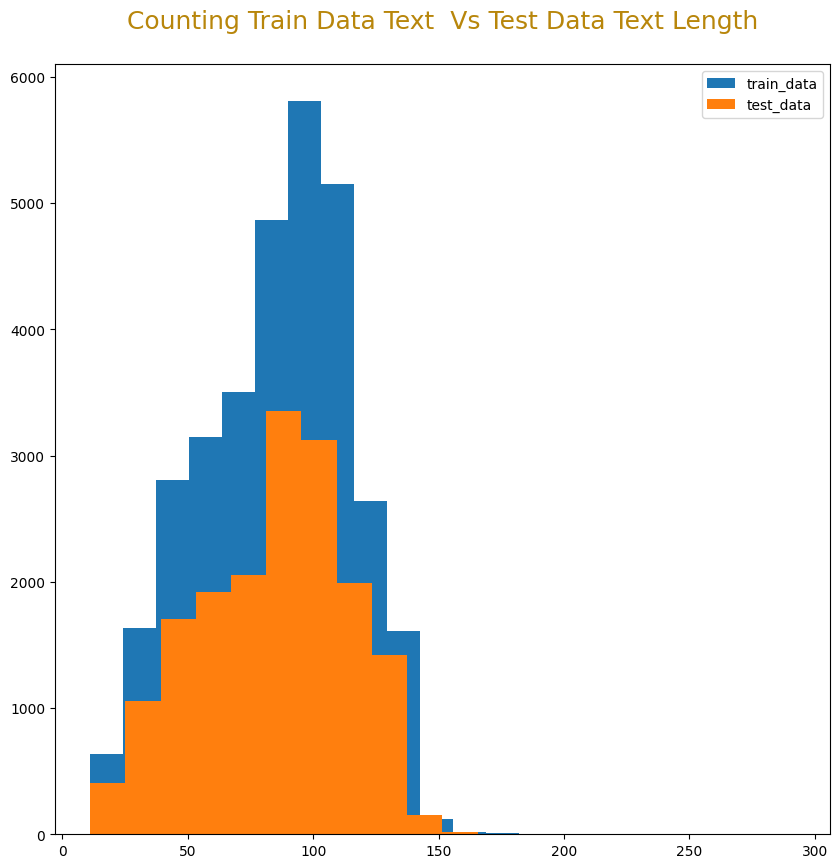

In [23]:
plt.figure(figsize=(10,10))
plt.hist(train_data_len, bins=20,label='train_data')
plt.hist(test_data_len , bins=20, label='test_data')
plt.title("Counting Train Data Text  Vs Test Data Text Length\n",fontsize=18,color="darkgoldenrod")
plt.legend()
plt.show()

# All Tweet Text Data WordCloud

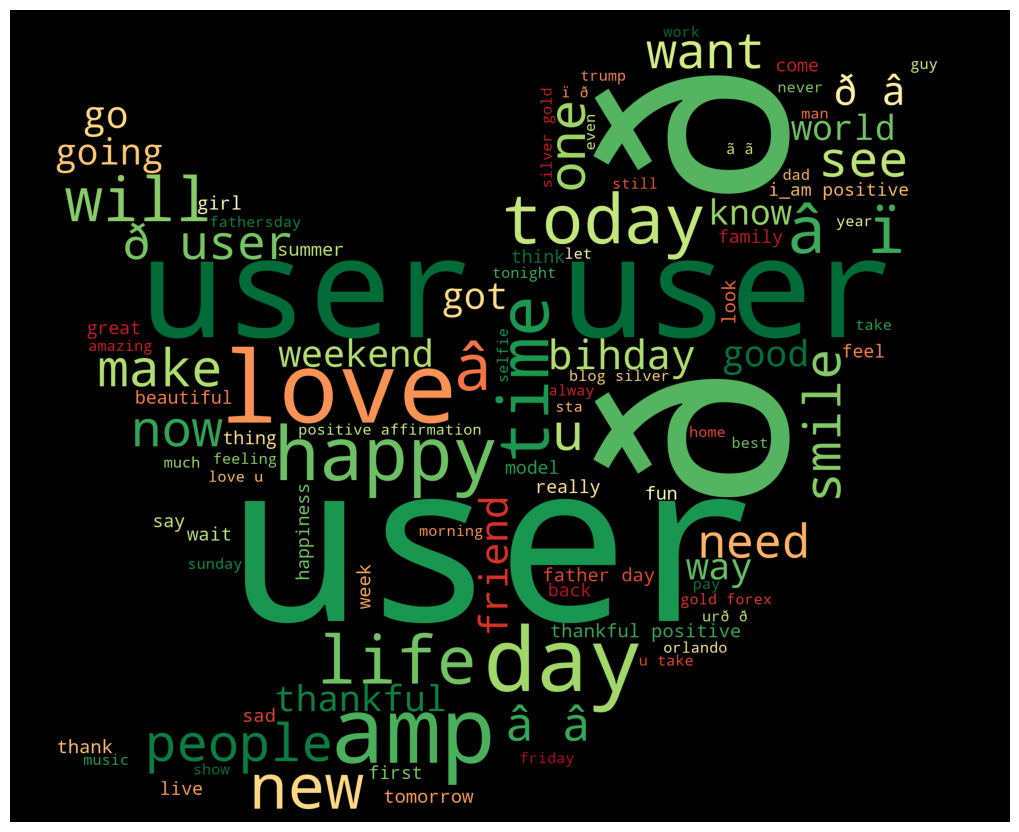

In [24]:
all_tweet_text=" ".join(train_data["tweet"].tolist())
plt.figure(figsize=(10,10))
wordcloud=WordCloud(stopwords=stopword,width=1600,height=800,max_words=100,mask=wordcloud_mask,colormap='RdYlGn').generate(all_tweet_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

# Racist_Sexist_Data Wordcloud

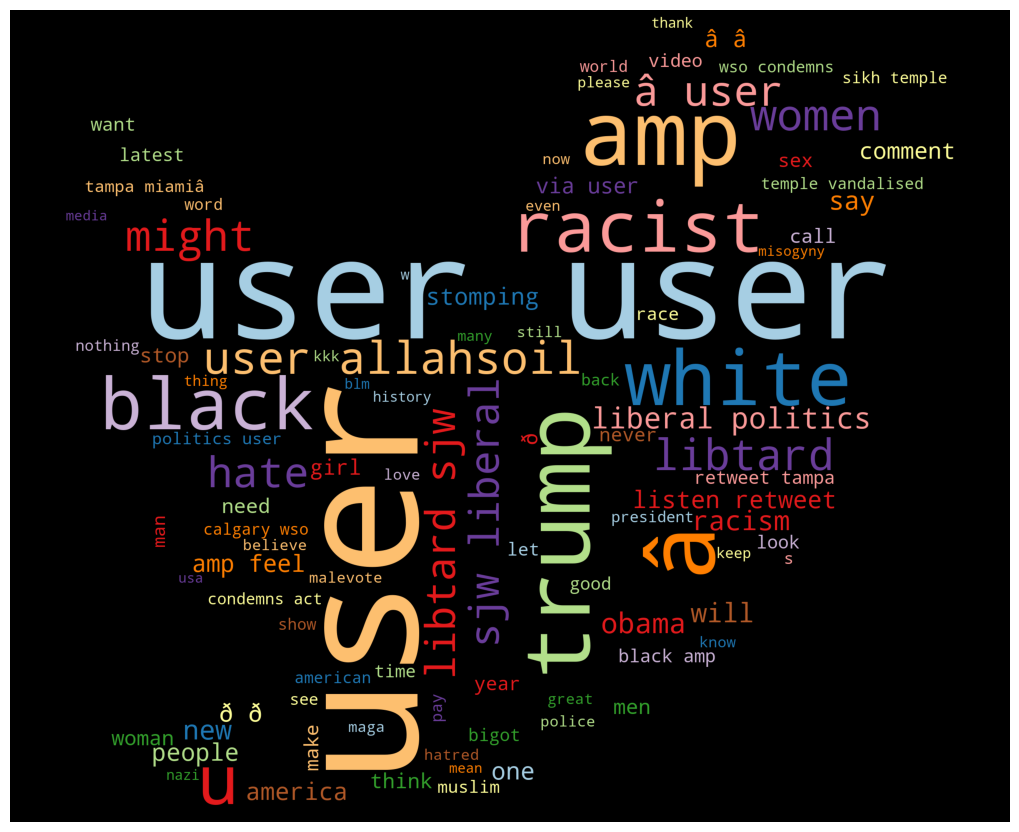

In [25]:
racist_sexist_data=train_data[train_data.label==1]
racist_tweet_text=" ".join(racist_sexist_data["tweet"].tolist())
plt.figure(figsize=(10,10))
wordcloud=WordCloud(stopwords=stopword,width=1600,height=800,max_words=100,mask=wordcloud_mask,colormap='Paired').generate(racist_tweet_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

# Positive Data Wordcloud

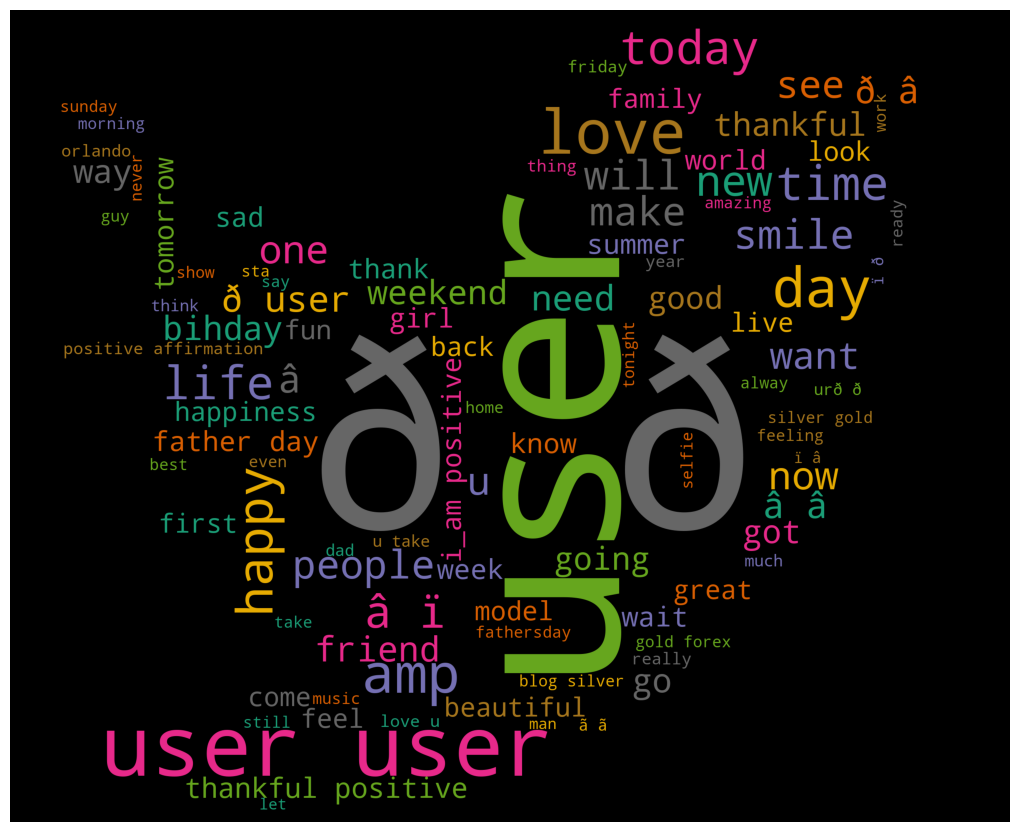

In [26]:
positive_data=train_data[train_data.label==0]
positive_tweet_text=" ".join(positive_data["tweet"].tolist())
plt.figure(figsize=(10,10))
wordcloud=WordCloud(stopwords=stopword,width=1600,height=800,max_words=100,mask=wordcloud_mask,colormap='Dark2').generate(positive_tweet_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

# Most Frequent Words In Train Data

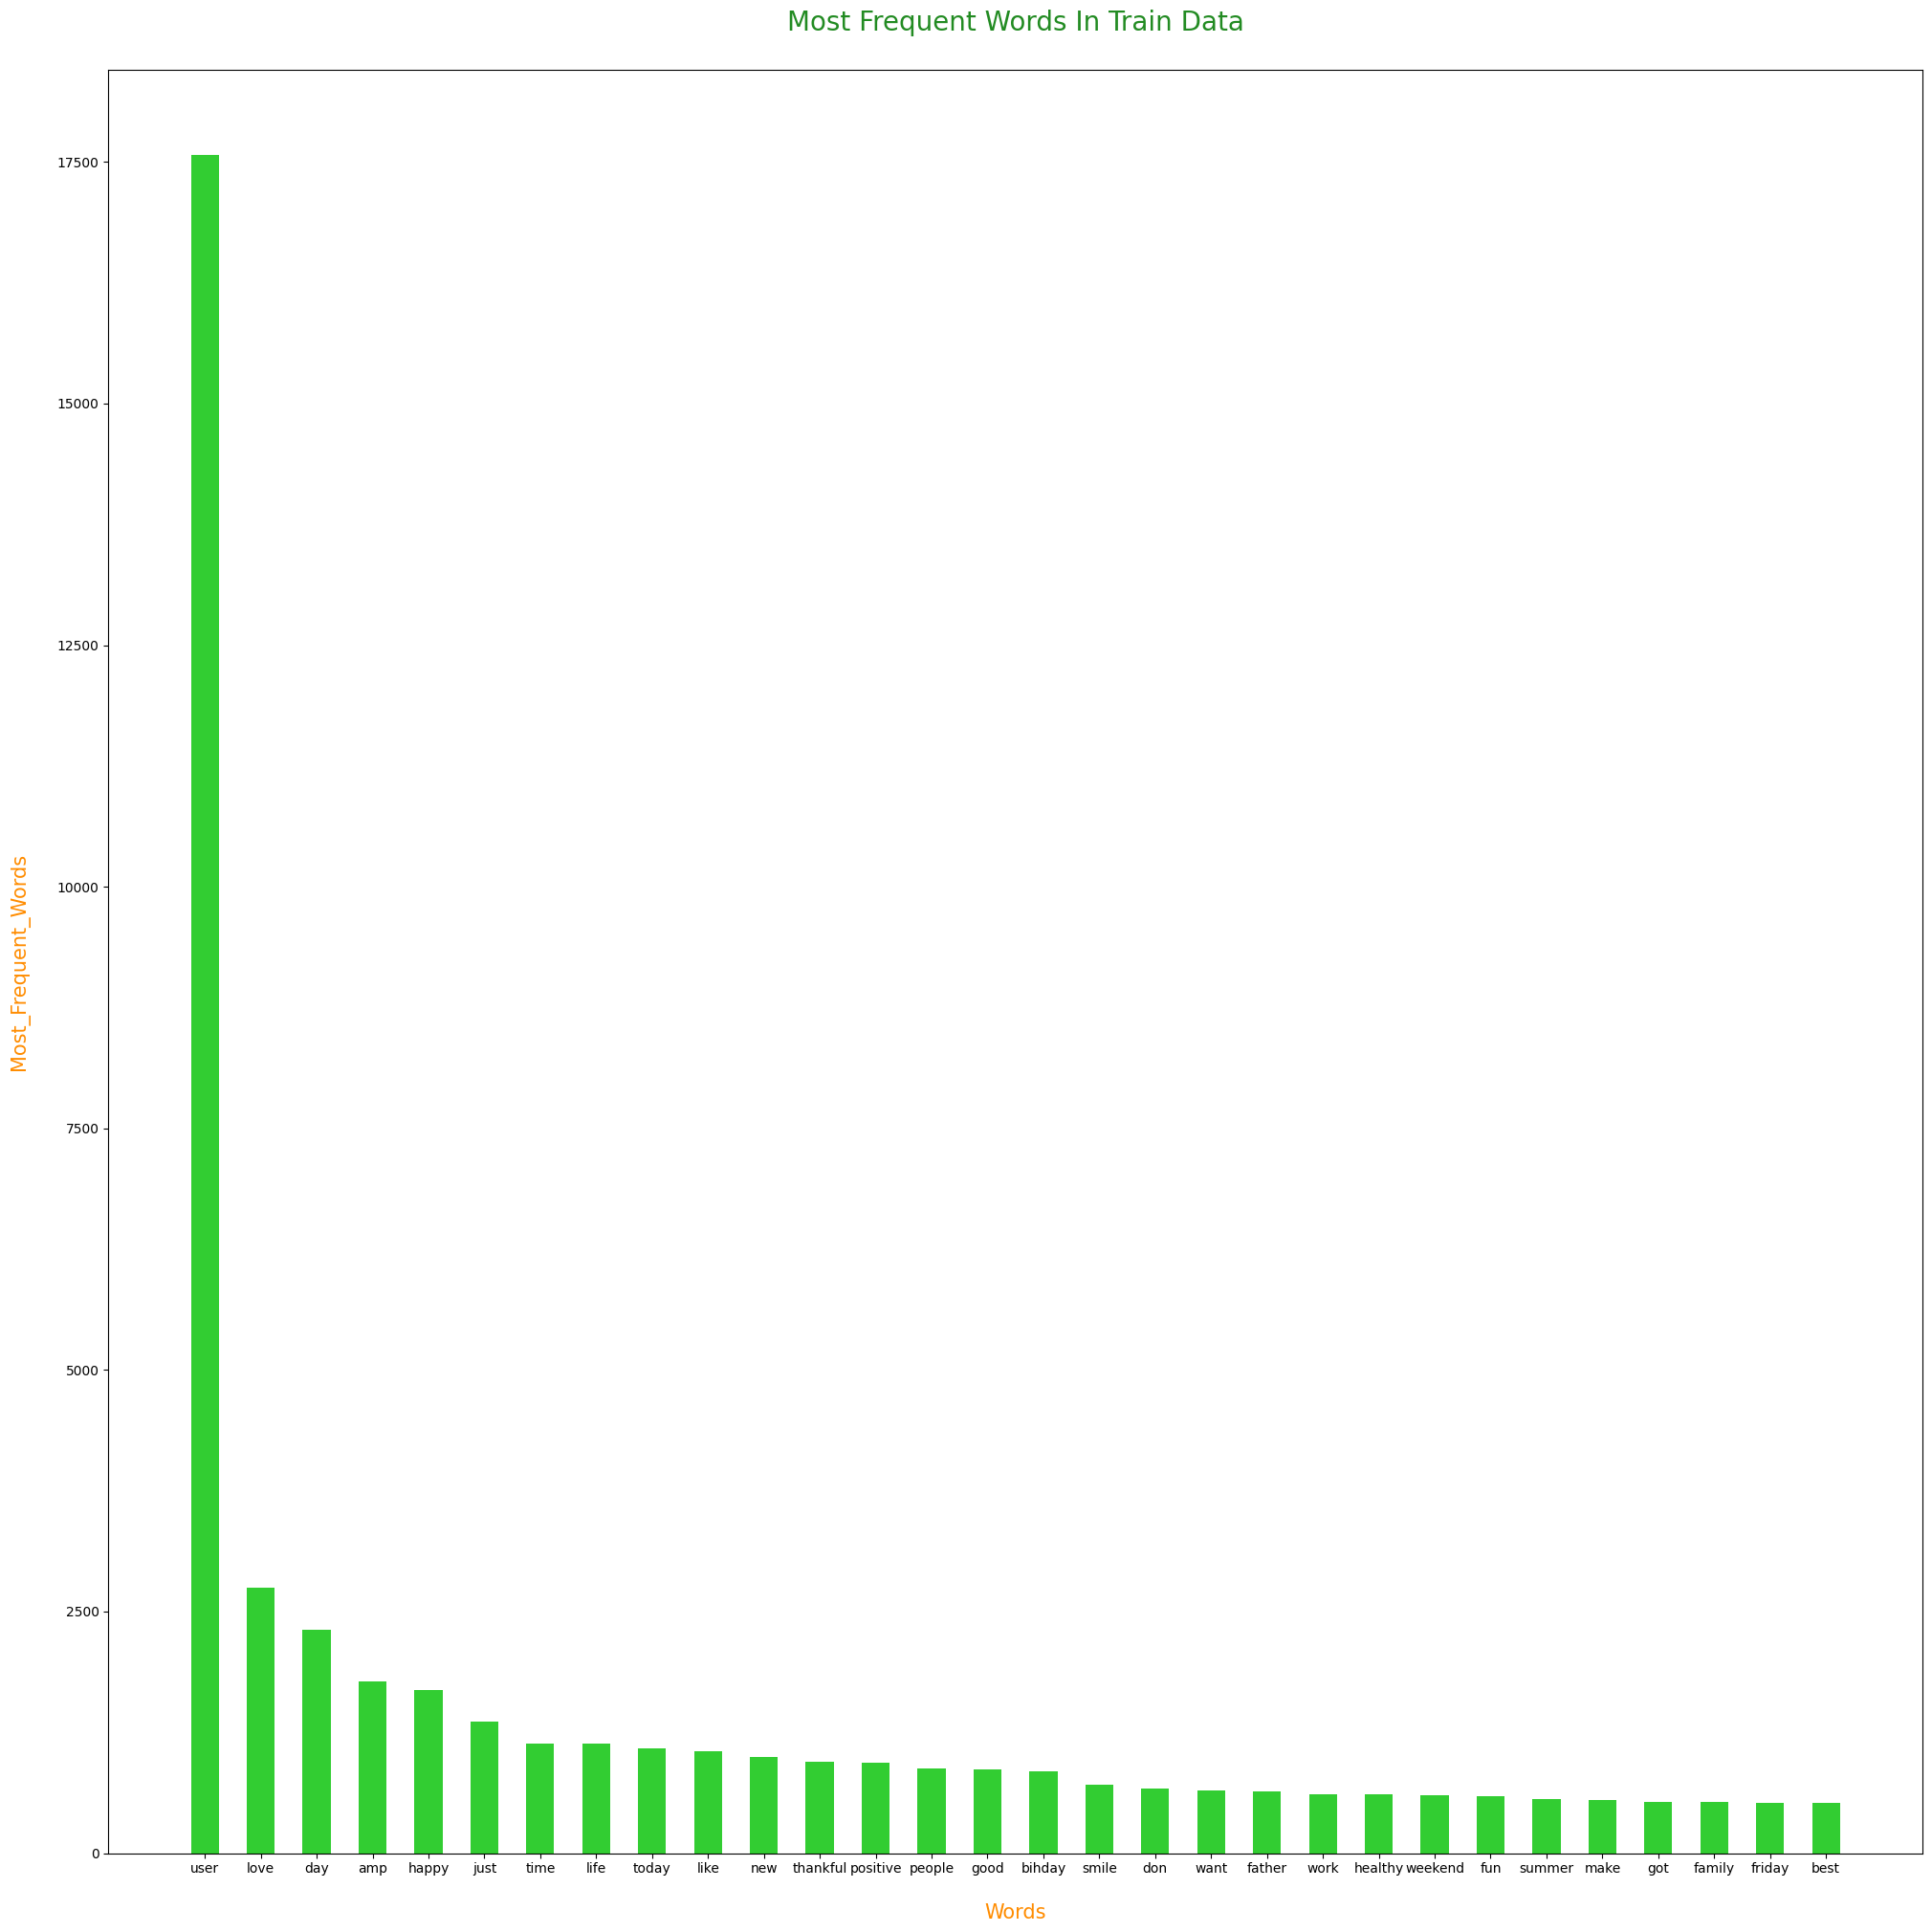

In [27]:
plt.figure(figsize=(20,20))
count_vectorizer=CountVectorizer(stop_words="english")
word=count_vectorizer.fit_transform(train_data.tweet)
sum_words=word.sum(axis=0)
most_freq_words=[(all_word,sum_words[0,i]) for all_word,i in count_vectorizer.vocabulary_.items()]
most_freq_words=sorted(most_freq_words,key=lambda x:x[1],reverse=True)

frequent_words=pd.DataFrame(most_freq_words,columns=["Words","Most_Frequent_Words"])

word_list = list(frequent_words.head(30).Words)
word_value_list = list(frequent_words.head(30).Most_Frequent_Words)

plt.bar(word_list, word_value_list, color ="limegreen",width=0.5)
plt.xlabel("\nWords",fontsize=15,color="darkorange")
plt.ylabel("Most_Frequent_Words\n",fontsize=15,color="darkorange")
plt.title("Most Frequent Words In Train Data\n",fontsize=20,color="forestgreen")
plt.tight_layout(pad=0)
plt.show()

In [28]:
train_data.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


# Data Preprocessing And Cleaning

In [29]:
def clean_text(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [30]:
train_data['clean_tweet_text'] = train_data.tweet.apply(clean_text)

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\com/nltk_data'
    - 'C:\\Users\\com\\anaconda3\\nltk_data'
    - 'C:\\Users\\com\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\com\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\com\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [25]:
train_data.head()

,tweet,label,clean_tweet_text
0,@user when a father is dysfunctional and is s...,0,father dysfunctional selfish drag kid dysfunct...
1,@user @user thanks for #lyft credit i can't us...,0,thanks lyft credit use cause offer wheelchair ...
2,bihday your majesty,0,bihday majesty
3,#model i love u take with u all the time in ...,0,model love u take u time ur
4,factsguide: society now #motivation,0,factsguide society motivation


# Extracting Hashtag Words

In [26]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [27]:
train_data['word_with_hashtag'] = train_data.tweet.apply(extract_hashtag)

In [28]:
train_data.head()

,tweet,label,clean_tweet_text,word_with_hashtag
0,@user when a father is dysfunctional and is s...,0,father dysfunctional selfish drag kid dysfunct...,run
1,@user @user thanks for #lyft credit i can't us...,0,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,bihday your majesty,0,bihday majesty,
3,#model i love u take with u all the time in ...,0,model love u take u time ur,model
4,factsguide: society now #motivation,0,factsguide society motivation,motivation


# Most Common Racist and Sexist Words With  Hashtag 





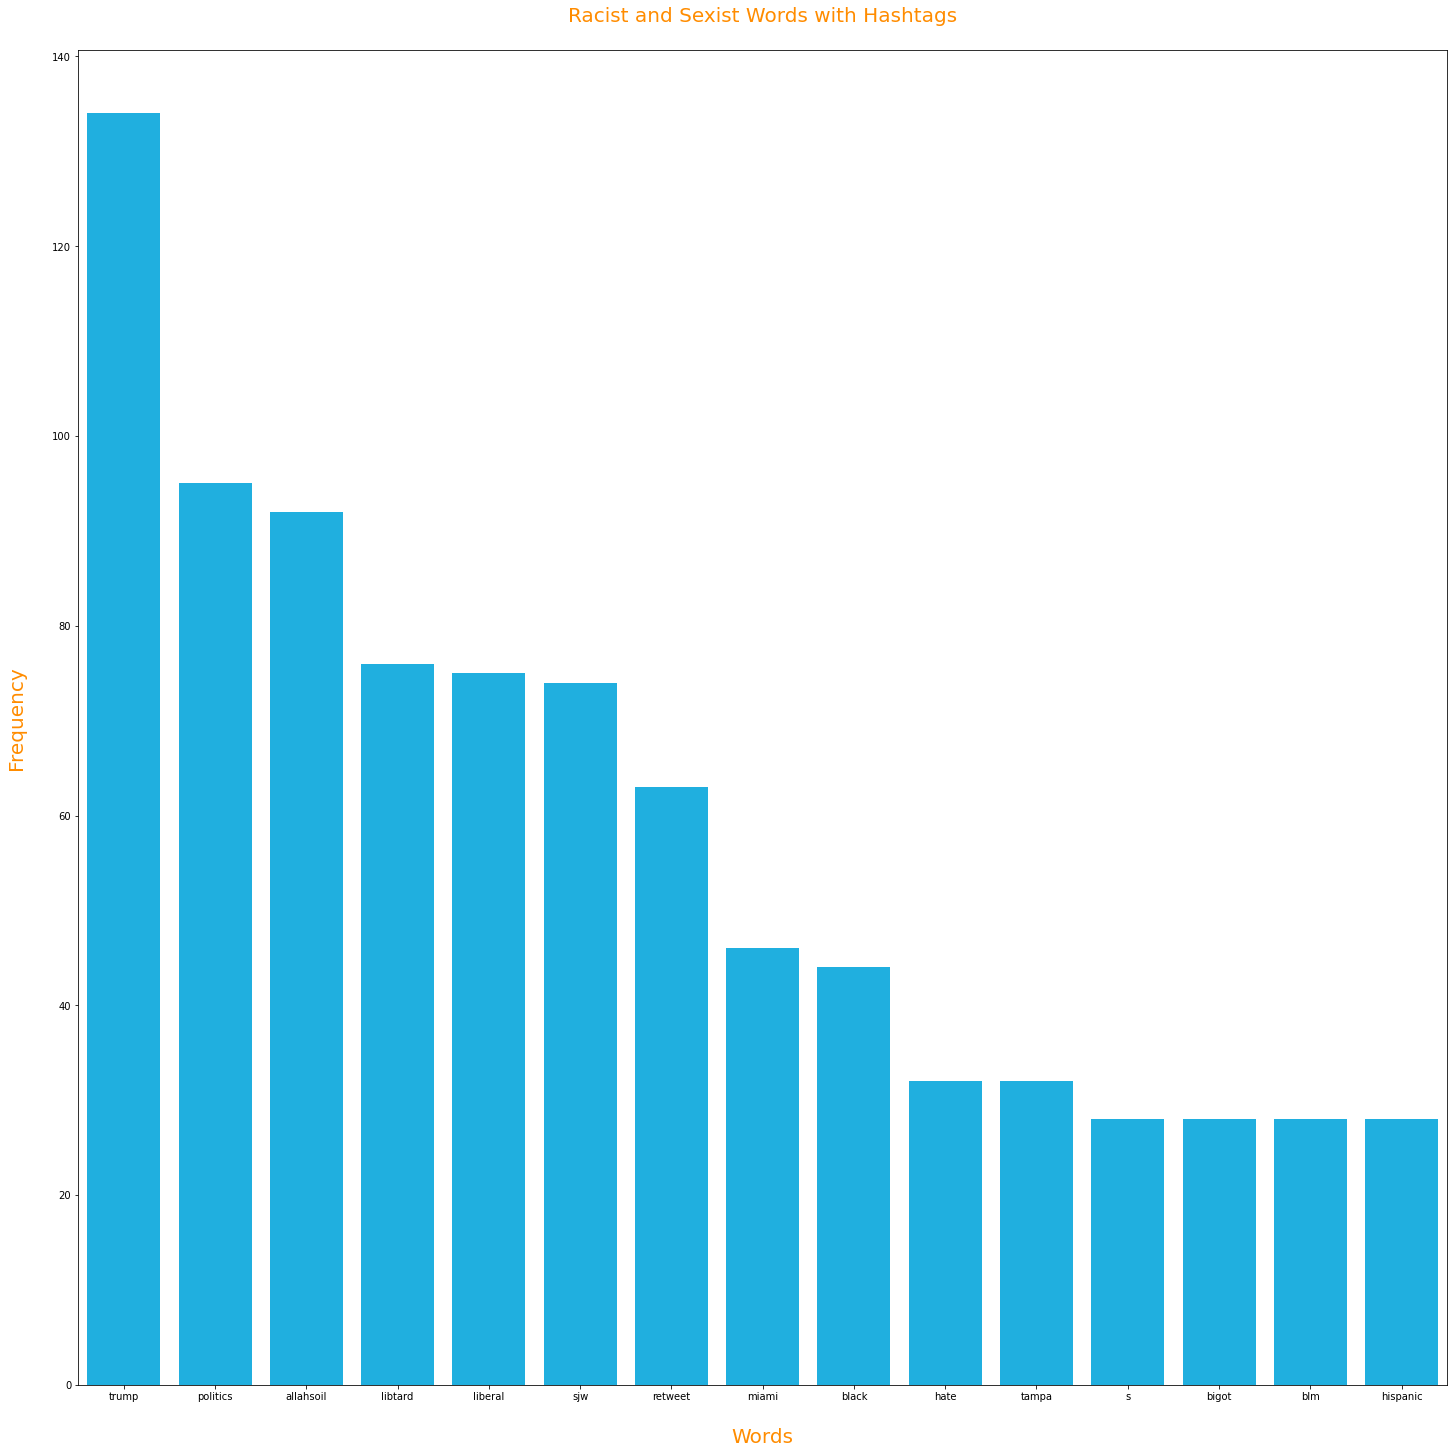

In [29]:
racist_sexist_hashtag = FreqDist(list(" ".join(train_data[train_data['label']==1]['word_with_hashtag']).split())).most_common(15)
racist_sexist_data = pd.DataFrame(racist_sexist_hashtag, columns=['words', 'frequency'])
plt.figure(figsize=(20,20))
sns.barplot(x='words',y="frequency" ,data=racist_sexist_data,color="deepskyblue")

plt.title('Racist and Sexist Words with Hashtags\n',fontsize=20,color="darkorange")
plt.xlabel("\nWords",fontsize=20,color="darkorange")
plt.ylabel("Frequency\n",fontsize=20,color="darkorange")
plt.tight_layout(pad=0)
plt.show()

# Most Common Positive Words With Hashtag

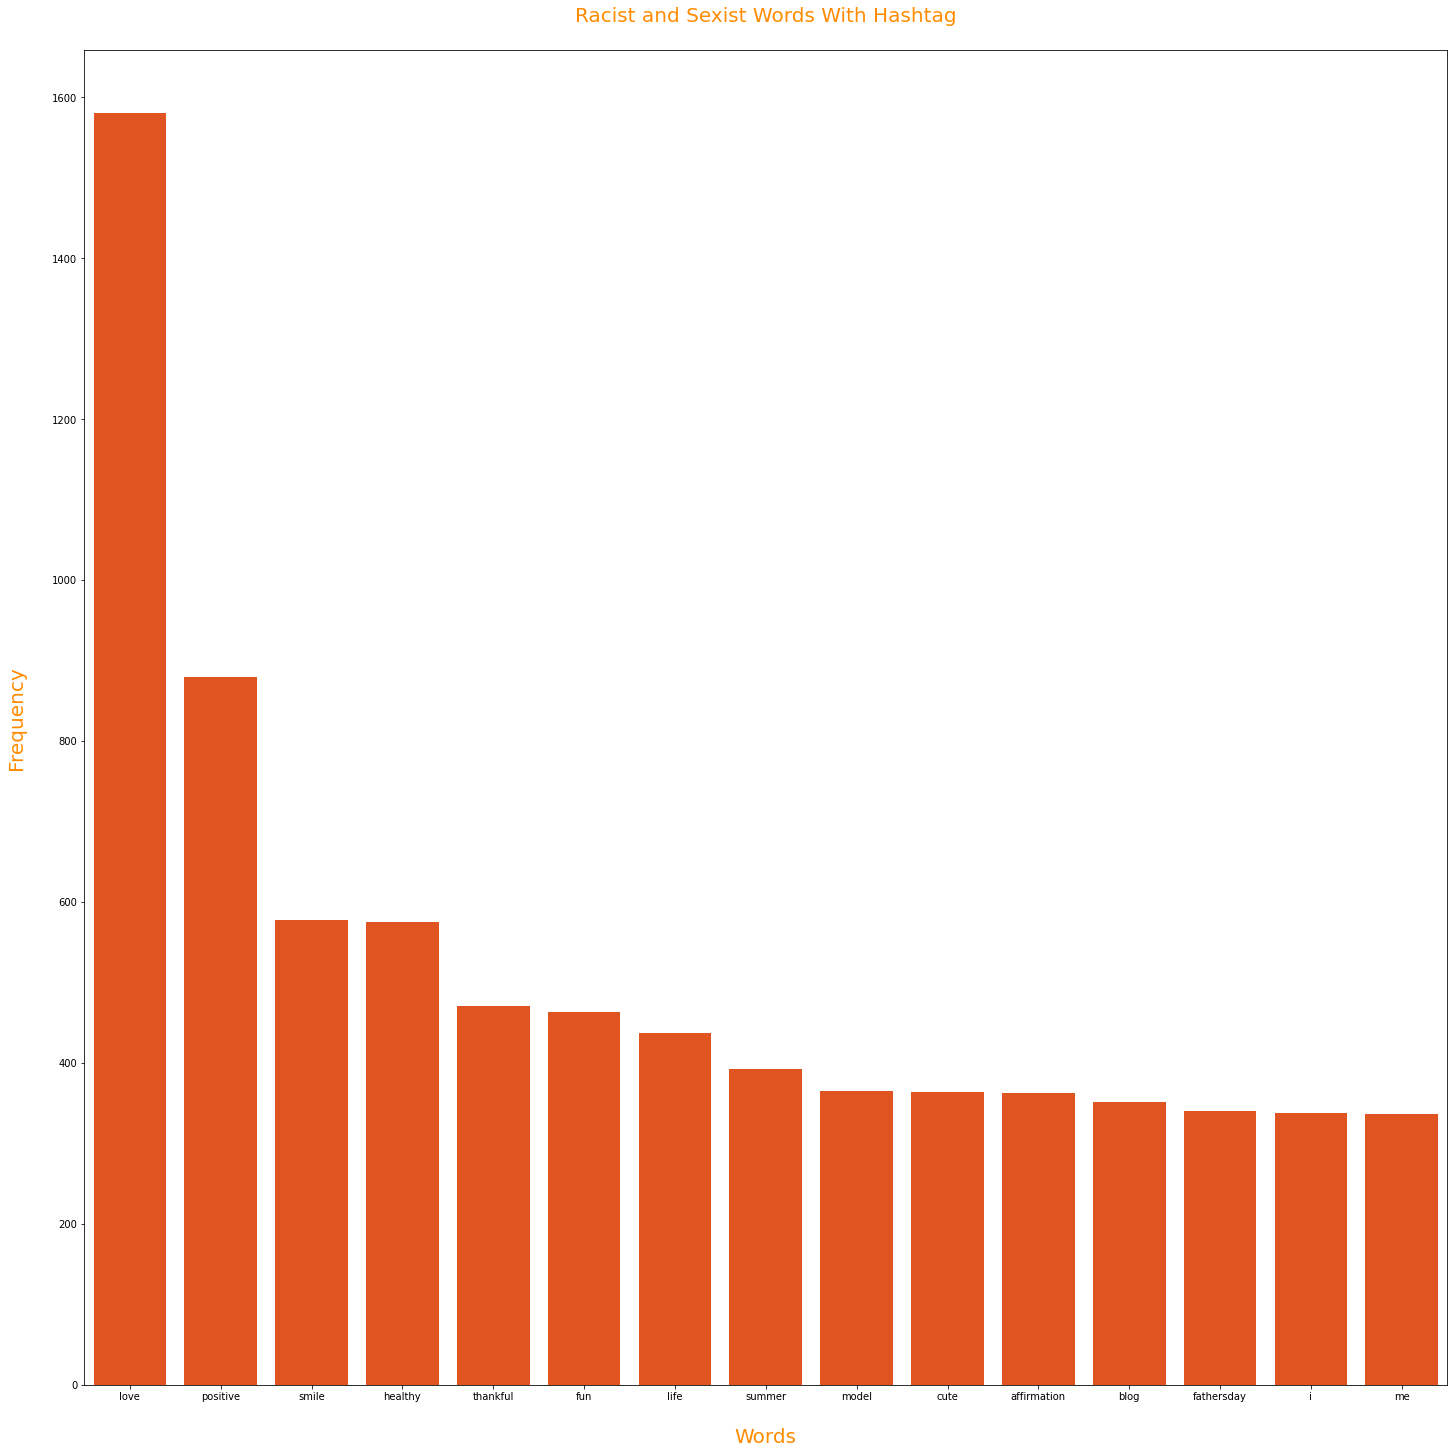

In [30]:
positive_hashtag = FreqDist(list(" ".join(train_data[train_data['label']==0]['word_with_hashtag']).split())).most_common(15)
positive_data = pd.DataFrame(positive_hashtag, columns=['words', 'frequency'])
plt.figure(figsize=(20,20))
sns.barplot(x='words',y="frequency" ,data=positive_data,color="orangered")

plt.title('Racist and Sexist Words With Hashtag\n',fontsize=20,color="darkorange")
plt.xlabel("\nWords",fontsize=20,color="darkorange")
plt.ylabel("Frequency\n",fontsize=20,color="darkorange")
plt.tight_layout(pad=0)
plt.show()

In [31]:
train_data.head()

,tweet,label,clean_tweet_text,word_with_hashtag
0,@user when a father is dysfunctional and is s...,0,father dysfunctional selfish drag kid dysfunct...,run
1,@user @user thanks for #lyft credit i can't us...,0,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,bihday your majesty,0,bihday majesty,
3,#model i love u take with u all the time in ...,0,model love u take u time ur,model
4,factsguide: society now #motivation,0,factsguide society motivation,motivation


In [32]:
train_data=train_data.drop(["tweet","word_with_hashtag"],axis=1)

In [33]:
train_data.head()

,label,clean_tweet_text
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation


In [34]:
max_len=128
text_data=train_data["clean_tweet_text"]
label_data=train_data["label"]

# Length of Text Data And Label Data

In [35]:
print("Length of Text Data :",len(text_data))
print("Length of Label Data :",len(label_data))

Length of Text Data : 31962
Length of Label Data : 31962


# roberta_tokenizer

In [36]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

# roberta_model

In [37]:
roberta_model = TFRobertaModel.from_pretrained("roberta-base")

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


# Sample Text

In [38]:
text_data[1000]

'booked trip europe travelwise europe london paris'

In [39]:
encode_data=roberta_tokenizer.encode_plus(text_data[1000],add_special_tokens = True,max_length =40,pad_to_max_length = True,truncation=True)

In [40]:
encode_data

{'input_ids': [0, 6298, 196, 1805, 2287, 2379, 1504, 10715, 2287, 2379, 784, 24639, 2242, 354, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [41]:
test_input_id=np.asarray(encode_data['input_ids'])
test_attention_mask=np.asarray(encode_data['attention_mask'])
output_data=roberta_model([test_input_id.reshape(1,-1),test_attention_mask.reshape(1,-1)])
type(output_data)

transformers.modeling_tf_outputs.TFBaseModelOutputWithPoolingAndCrossAttentions

In [42]:
output_data

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 40, 768), dtype=float32, numpy=
array([[[-0.04366976,  0.08874609,  0.02536068, ..., -0.08118848,
         -0.04473743, -0.030428  ],
        [ 0.14550456, -0.3758911 ,  0.4891163 , ..., -0.06621885,
         -0.06759648,  0.03127505],
        [-0.0070895 ,  0.13201854,  0.15972036, ...,  0.02193367,
          0.17207243, -0.13367593],
        ...,
        [-0.10216551,  0.07789801,  0.10664352, ..., -0.2187616 ,
         -0.00234192,  0.05975109],
        [-0.10216551,  0.07789801,  0.10664352, ..., -0.2187616 ,
         -0.00234192,  0.05975109],
        [-0.10216551,  0.07789801,  0.10664352, ..., -0.2187616 ,
         -0.00234192,  0.05975109]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-2.97437818e-03, -2.31021643e-01, -2.19711259e-01,
        -9.25465599e-02,  1.23964660e-01,  1.91660568e-01,
         2.67439544e-01, -6.76766932e-02, -6.08981550e-

In [43]:
roberta_tokenizer.decode(encode_data["input_ids"])

'<s>booked trip europe travelwise europe london paris</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [44]:
final_text_data=train_data["clean_tweet_text"]
final_label_data=np.array(label_data)

In [45]:
def roberta_encode(final_text_data,max_len):
    input_ids=[]
    attention_masks=[]
    
    for i in range(len(final_text_data)):
        encode_data=roberta_tokenizer.encode_plus(final_text_data[i],add_special_tokens=True,max_length=max_len,pad_to_max_length=True,return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])
    return np.array(input_ids),np.array(attention_masks)
        

In [46]:
text_input_ids,text_attention_masks = roberta_encode(final_text_data,max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [47]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,final_label_data.shape))

Text Input Ids Shape (31962, 128) 
Text Input Attention Mask Shape (31962, 128) 
Label Data shape (31962,)


In [48]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(text_input_ids,final_label_data,text_attention_masks,test_size=0.2,random_state=42,shuffle=True)

In [49]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))

Train input shape (25569, 128)
Test input shape (6393, 128)
Train label shape (25569,)
Test label shape (6393,)
Train attention mask shape (25569, 128)
Test attention mask shape (6393, 128)


# Create Roberta Model

In [50]:
def Create_Roberta_Model():
    input_ids=tf.keras.Input(shape=(max_len,),dtype="int32")
    attention_masks=tf.keras.Input(shape=(max_len,),dtype="int32")
    
    roberta_model = TFRobertaModel.from_pretrained("roberta-base")
    output_dim = roberta_model(input_ids=input_ids, attention_mask=attention_masks)[0][:,0,:]
    
    dense_layer = tf.keras.layers.Dense(128, activation="relu")(output_dim)
    dropout = tf.keras.layers.Dropout(0.5)(dense_layer)
    final_layer = tf.keras.layers.Dense(2, activation='softmax')(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=final_layer)
    
    return model


In [51]:
model=Create_Roberta_Model()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

optimizer = tf.keras.optimizers.Adam(lr=1e-5)

model.compile(loss=loss,optimizer=optimizer, metrics=["accuracy"])


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [52]:
history=model.fit([X_train_input,train_mask],Y_train_label,batch_size=42,epochs=10,validation_data=([X_test_input,test_mask],Y_test_label))

2023-02-20 22:25:23.498048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
609/609 [==============================] - 423s 670ms/step - loss: 0.1685 - accuracy: 0.9454 - val_loss: 0.1177 - val_accuracy: 0.9578
Epoch 2/10
609/609 [==============================] - 405s 664ms/step - loss: 0.1137 - accuracy: 0.9606 - val_loss: 0.1108 - val_accuracy: 0.9592
Epoch 3/10
609/609 [==============================] - 405s 665ms/step - loss: 0.0872 - accuracy: 0.9682 - val_loss: 0.1149 - val_accuracy: 0.9579
Epoch 4/10
609/609 [==============================] - 405s 665ms/step - loss: 0.0618 - accuracy: 0.9772 - val_loss: 0.1113 - val_accuracy: 0.9640
Epoch 5/10
609/609 [==============================] - 405s 665ms/step - loss: 0.0482 - accuracy: 0.9823 - val_loss: 0.1279 - val_accuracy: 0.9611
Epoch 6/10
609/609 [==============================] - 405s 665ms/step - loss: 0.0340 - accuracy: 0.9874 - val_loss: 0.1528 - val_accuracy: 0.9615
Epoch 7/10
609/609 [==============================] - 405s 665ms/step - loss: 0.0247 - accuracy: 0.9913 - val_loss: 0.1617 -

In [53]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],marker="o",linestyle=":",markersize=10,color="m",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="D",linestyle=":",markersize=10,color="b",label="val_accuracy")
    plt.title("Model Accuracy\n",fontsize=20,color="darkorange")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Accuracy",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    
  
    plt.subplot(222)
    plt.plot(history.history["accuracy"],marker="v",linestyle="-.",markersize=10,color="g",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="s",linestyle="--",markersize=10,color="r",label="val_accuracy")
    plt.title("Model Loss\n",fontsize=20,color="limegreen")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Loss",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

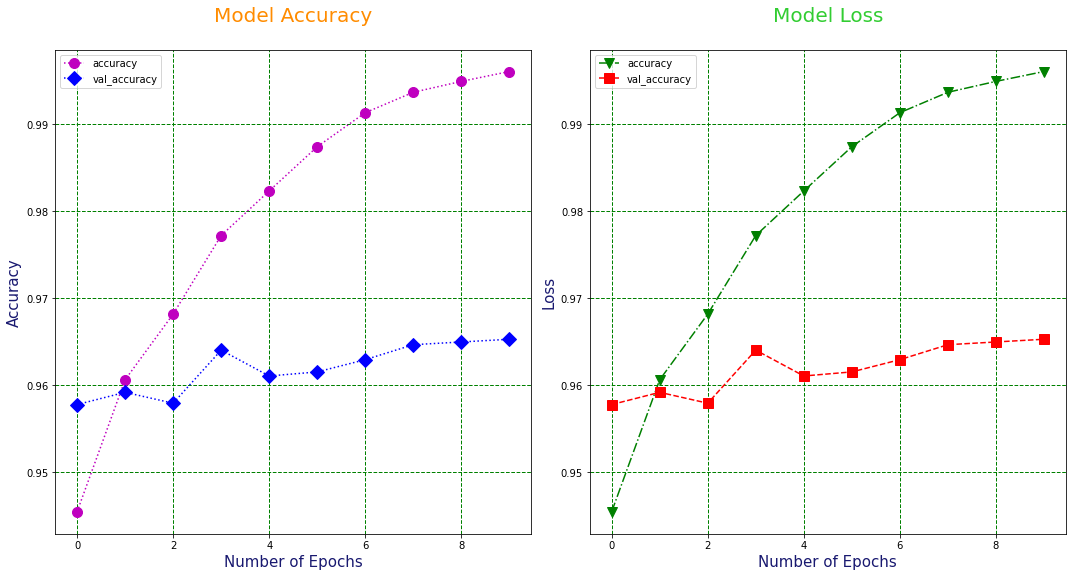

In [54]:
model_loss_and_accuracy(history)

# F1 Score

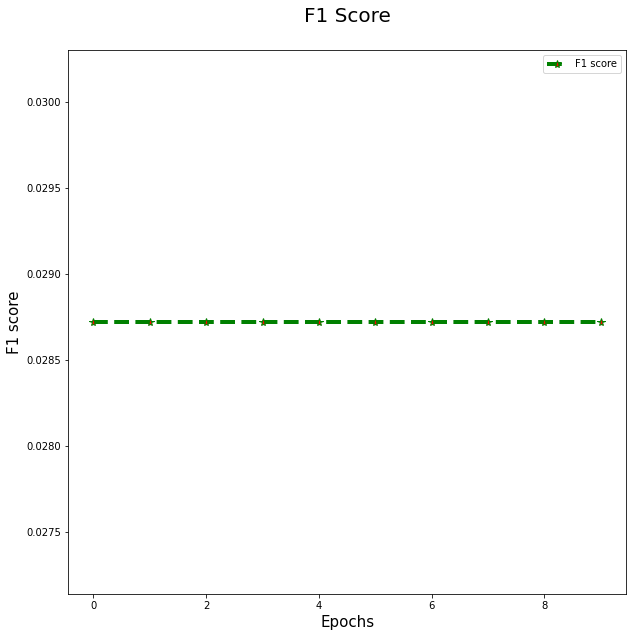

In [55]:
def plot_f1_score(history):
    f1_scores = []
    for epoch in range(len(history.history['val_loss'])):
        model.set_weights(history.model.get_weights())
        predictions = model.predict([X_test_input, test_mask])
        predictions = [round(p[0]) for p in predictions]
    
        f1_scores.append(f1_score(Y_test_label, predictions, average='weighted'))
    plt.figure(figsize=(10,10))
    plt.plot(range(len(history.history['val_loss'])), f1_scores, label='F1 score',marker="*",color="g",linestyle="--",linewidth=4,markersize=8,markerfacecolor="r")
    plt.title("F1 Score\n",color="black",fontsize=20)
    plt.xlabel('Epochs',fontsize=15,color="black")
    plt.ylabel('F1 score',fontsize=15,color="black")
    plt.legend()
    plt.show()


plot_f1_score(history)


# Label Names

In [56]:
label_name=["Positive","Racist and Sexist"]

In [57]:
pred=model.predict([X_test_input, test_mask])
prediction=np.argmax(pred, axis=1)

# Accuracy Score

In [58]:
print("Accuracy Score is",accuracy_score(Y_test_label,prediction))

Accuracy Score is 0.9652745190051619


# ROC AUC Score

In [59]:
print("ROC AUC Score is {}".format(roc_auc_score(Y_test_label, pred[:,1])))

ROC AUC Score is 0.970835955899518


# Average Precision Score

In [60]:
# Get the predicted probabilities for the positive class
pred_probs = model.predict([X_test_input, test_mask])[:,1]

# Binarize the test labels
Y_test_binarized = (Y_test_label == 1).astype(int)

# Calculate the average precision score
average_precision = average_precision_score(Y_test_binarized, pred_probs)

print("Average Precision Score :", average_precision)


Average Precision Score : 0.8302444625472132


# receiver operating characteristic curve

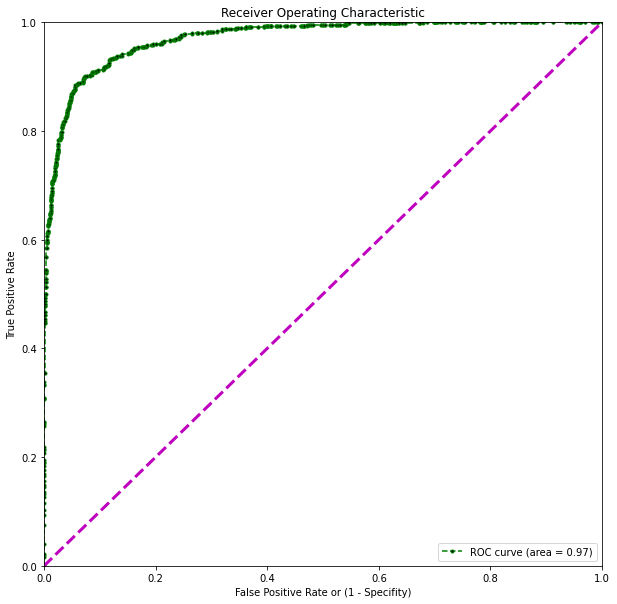

In [61]:
pred_positive = pred[:,1]
fpr, tpr, thresholds = roc_curve(Y_test_label, pred_positive)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,color="g",linestyle="--",marker="o",markersize=3,markerfacecolor="k")

plt.plot([0, 1], [0, 1],linestyle="--",linewidth=3,color="m")  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



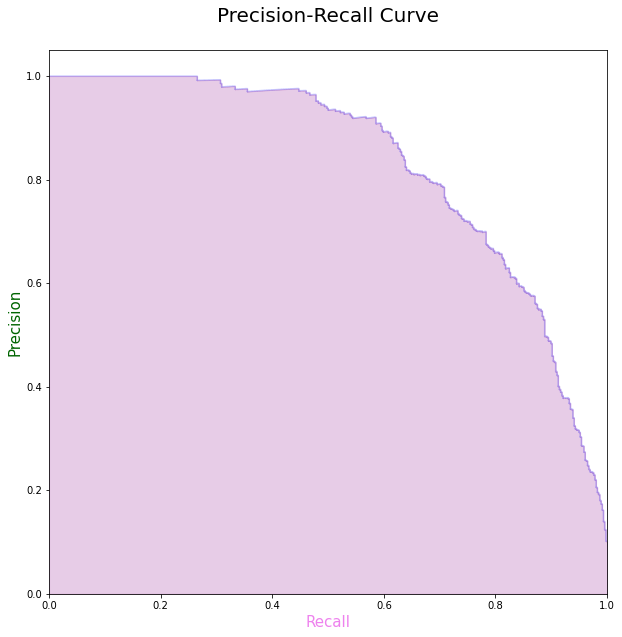

In [62]:
# Calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(Y_test_label,pred[:,1])

# Plot the PR curve
plt.figure(figsize=(10,10))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color="darkmagenta")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve\n',fontsize=20,color="black")
plt.xlabel("Recall",fontsize=15,color="violet")
plt.ylabel("Precision",fontsize=15,color="darkgreen")
plt.show()


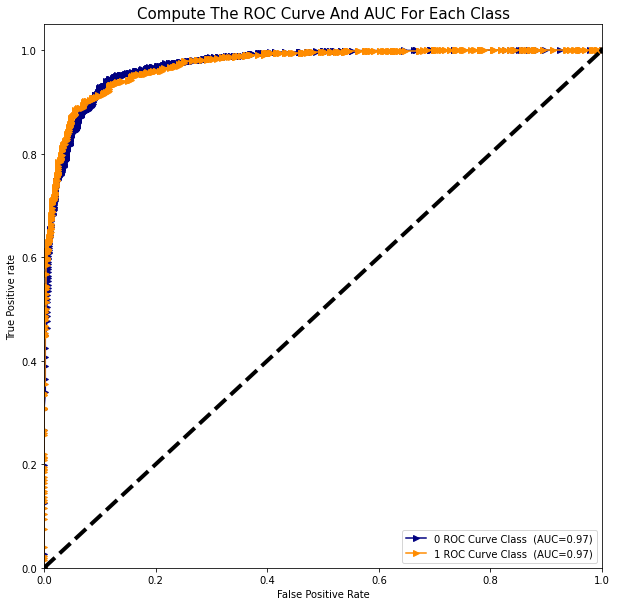

In [63]:
# Encode the labels
label_encoder=LabelEncoder()
label_encoder.fit(Y_test_label)
test_label_data=label_encoder.transform(Y_test_label)
classes=label_encoder.classes_
colors = ["navy", "darkorange"]
plt.figure(figsize=(10,10))

# Compute the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = dict()
for i, class_ in enumerate(classes):
    # Binarize the label data
    label_binarized = (test_label_data == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(label_binarized, pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    plt.plot(fpr[i], tpr[i], label='%s ROC Curve Class  (AUC=%0.2f)' % (class_, roc_auc[i]), marker=">", color=colors[i])

plt.plot([0,1],[0,1], marker="H", color="k", linestyle="--", linewidth=4)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Compute The ROC Curve And AUC For Each Class', color="black", fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()


# Compute The Precision Curve And Area Under Curve For Each Class

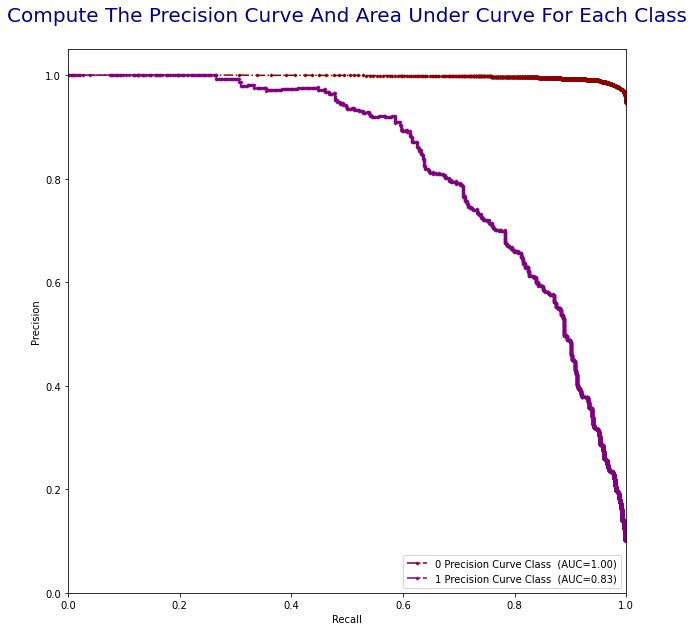

In [64]:
# Encode the labels
label_encoder=LabelEncoder()
label_encoder.fit(Y_test_label)
test_label_data=label_encoder.transform(Y_test_label)
classes=label_encoder.classes_
colors = ["darkred", "purple"]
plt.figure(figsize=(10,10))

# Compute the PR curve and AUC for each class
precision = {}
recall = {}
pr_auc = dict()
for i, class_ in enumerate(classes):
    # Binarize the label data
    label_binarized = (test_label_data == i).astype(int)
    precision[i], recall[i], _ = precision_recall_curve(label_binarized, pred[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

    # Plot the PR curve for each class
    plt.plot(recall[i], precision[i], label='%s Precision Curve Class  (AUC=%0.2f)' % (class_, pr_auc[i]),color=colors[i],marker="D",markersize=2,linestyle="-.")

plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Compute The Precision Curve And Area Under Curve For Each Class\n',color="darkblue",fontsize=20)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()

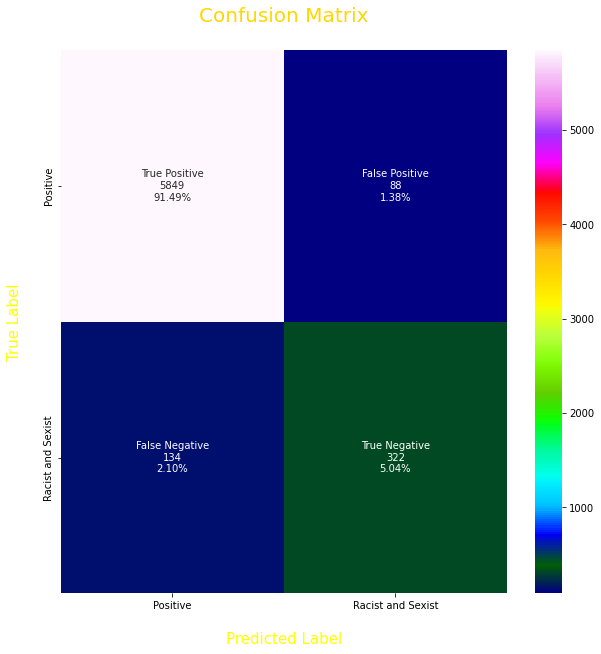

In [65]:
plt.figure(figsize=(10,10))

cf_matrix=confusion_matrix(Y_test_label,prediction)
label_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
label_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
label_names = ["True Positive","False Positive","False Negative","True Negative"]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(label_names,label_counts,label_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='gist_ncar',xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",color="gold",fontsize=20)
plt.ylabel("True Label\n",fontsize=15,color="yellow")
plt.xlabel("\nPredicted Label",fontsize=15,color="yellow")
plt.show()

In [66]:
print(classification_report(Y_test_label,prediction,target_names=label_name))

                   precision    recall  f1-score   support

         Positive       0.98      0.99      0.98      5937
Racist and Sexist       0.79      0.71      0.74       456

         accuracy                           0.97      6393
        macro avg       0.88      0.85      0.86      6393
     weighted avg       0.96      0.97      0.96      6393



# Custom Data Prediction
> * 0==Positive
> * 1==Racist And Sexist

In [67]:
x="hank you very much for sharing your experience with us.We are really happy that your interaction with our brand was so positive.I just want to let you know that we are acting upon your feedback to make some vital changes to the way we operate [list of changes].As you can see, the opinions of our clients help us to provide better experiences and grow as a company.Regards,"
pred_input=roberta_tokenizer.encode_plus(x,add_special_tokens = True,max_length =128,pad_to_max_length = True,truncation=True)
test_input_id=np.array(pred_input['input_ids'])
test_input_mask=np.array(pred_input['attention_mask'])
# Get the predicted probabilities
text_predict = model.predict([test_input_id.reshape(1,-1), test_input_mask.reshape(1,-1)])

# Get the class with the highest probability
predicted_class = np.argmax(text_predict, axis=-1)[0]

# Check if the input is toxic (1) or positive (0)
if predicted_class == 1:
    print("The input text is toxic.")
else:
    print("The input text is positive.")


The input text is positive.


In [3]:
1

1

In [4]:
0

0